#### **Global Covid-19 Fatalities**

**Project Overview**

**Objective :** \
Analyze Covid-19 worldwide fatalities across various dimensions like country, date, cumulative death and daily death

**Dataset Source :** \
*kaggle.com/datasets/luisheitorribeiro/covid-19-fatalities-data*

**Goal :** \
Provide actionable insights into potential relationship between single and multiple variables. \
Identifying trend of fatalities by each country and each year

##### Import Libraries

In [2]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style libraries
# plt.style.use('dark_background')
import matplotlib
custom = {
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (10,8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.facecolor': '#aaaaaa',
    'figure.facecolor': '#bbbbbb',
    'grid.color': '#000000',
    'grid.linewidth': 0.5,
    'legend.edgecolor': '#000000',
}
matplotlib.rcParams.update(custom)
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Kagglehub library
import kagglehub

##### Data Collection

Loading Dataset

The dataset is stored in a downloadable csv file. \
It contains details such as Country, Date and Daily Death

In [7]:
# Download csv files from kaggle and stored in local machine

url = kagglehub.dataset_download('luisheitorribeiro/covid-19-fatalities-data')
urlpath = '\data_global_data.csv'
file = f'{url}{urlpath}'
df = pd.read_csv(fr'{file}', low_memory=False, encoding='utf-8')

##### Data Preprocessing

- Remove null or duplicate values
- Convert data types
- Assign/Create new column based on suitable preference

In [4]:
"""
Data Inspection
"""
# Summary
print(f'Summary Statistics: \n{df.describe()}\n')

# Dataset Shape
print(f'Total Rows: {df.shape[0]} \nTotal Columns: {df.shape[1]}\n')

# Missing Value
print(f'Missing Data per Column: \n{df.isnull().sum()}\n')

# Duplicate Value
print(f'Duplicate Data per Column: \n{df.duplicated().sum()}\n')

# Head
print(f'Head: \n{df.head()}\n')

# Info
print(f'Info: \n{df.info()}\n')

Summary Statistics: 
             deaths   daily_deaths
count  2.182860e+05  218286.000000
mean   1.849231e+04      30.814629
std    7.371275e+04     161.716805
min    0.000000e+00       0.000000
25%    3.900000e+01       0.000000
50%    7.250000e+02       0.000000
75%    6.872000e+03       6.000000
max    1.099488e+06   11447.000000

Total Rows: 218286 
Total Columns: 4

Missing Data per Column: 
country         0
date            0
deaths          0
daily_deaths    0
dtype: int64

Duplicate Data per Column: 
0

Head: 
       country      date  deaths  daily_deaths
0  Afghanistan  01/23/20       0           0.0
1  Afghanistan  01/24/20       0           0.0
2  Afghanistan  01/25/20       0           0.0
3  Afghanistan  01/26/20       0           0.0
4  Afghanistan  01/27/20       0           0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218286 entries, 0 to 218285
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   --

In [10]:
"""
Convert Data Types
"""
df['daily_deaths'] = df['daily_deaths'].astype('int')
df['date'] = pd.to_datetime(df['date']) #.dt.strftime('%Y-%m-%d')

In [11]:
"""
Assign New Column
"""
df['month'] = df['date'].dt.strftime('%Y-%m')
df['year'] = df['date'].dt.strftime('%Y')

##### Exploratory Data Analysis

In [7]:
# Overview dataset head
df [:2]

,country,date,deaths,daily_deaths,month,year
0,Afghanistan,2020-01-23,0,0,2020-01,2020
1,Afghanistan,2020-01-24,0,0,2020-01,2020


Fatalities Distribution :\
Identify fatalities trends from different timeline

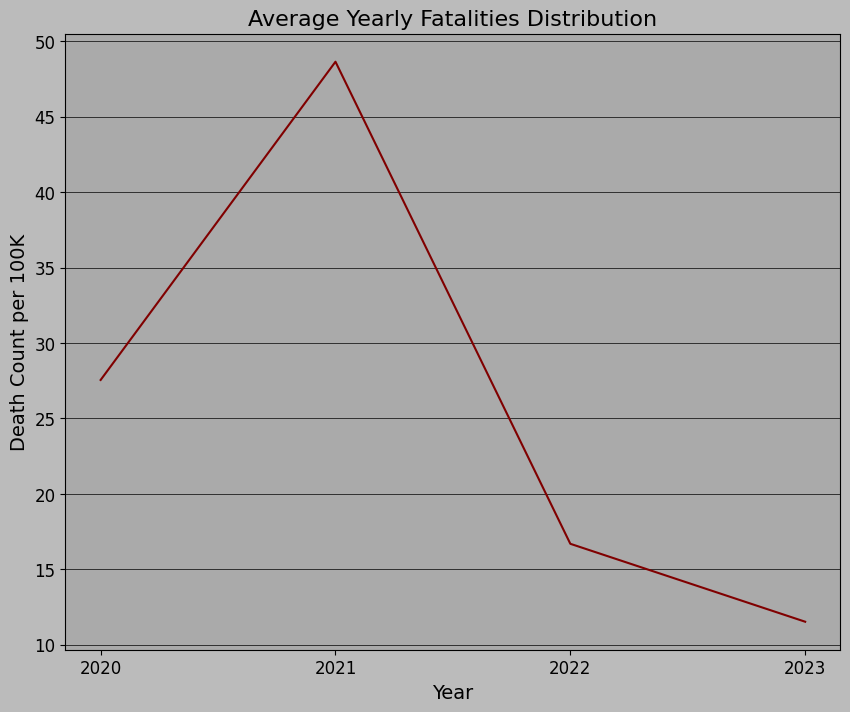

In [ ]:
# Average Fatalities Distribution by Yearly

avg_fatal_year = df.groupby('year')['daily_deaths'].mean().reset_index()
plt.plot(avg_fatal_year['year'], avg_fatal_year['daily_deaths'],
          color='maroon')
plt.title('Average Yearly Fatalities Distribution')
plt.xlabel('Year')
plt.ylabel('Death Count per 100K')
plt.grid(axis='y')
plt.show()

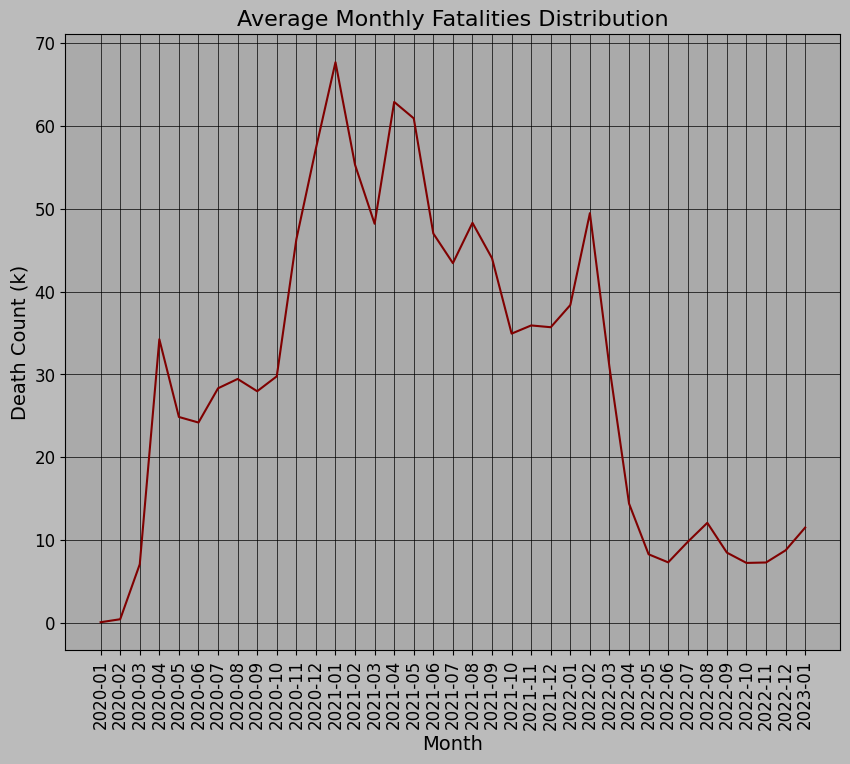

In [12]:
# Average Fatalities Distribution by Monthly

avg_fatal_month = df.groupby('month')['daily_deaths'].mean().reset_index()
plt.plot(avg_fatal_month['month'], avg_fatal_month['daily_deaths'],
          color='maroon')
plt.title('Average Monthly Fatalities Distribution')
plt.xlabel('Month')
plt.ylabel('Death Count (k)')
plt.xticks(rotation=90)
plt.grid(axis='both')
plt.show()

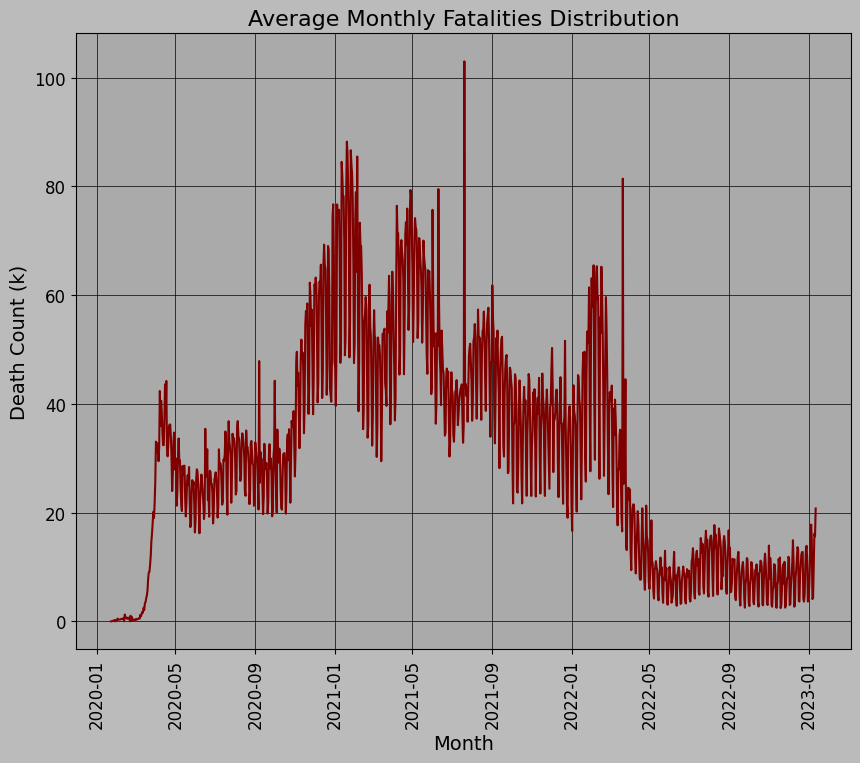

In [17]:
# Average Fatalities Distribution by Daily

avg_fatal_day = df.groupby('date')['daily_deaths'].mean().reset_index()
plt.plot(avg_fatal_day['date'], avg_fatal_day['daily_deaths'],
          color='maroon')
plt.title('Average Monthly Fatalities Distribution')
plt.xlabel('Month')
plt.ylabel('Death Count (k)')
plt.xticks(rotation=90)
plt.grid(axis='both')
plt.show()

Country Distribution :\
Identify fatalities distribution by countries

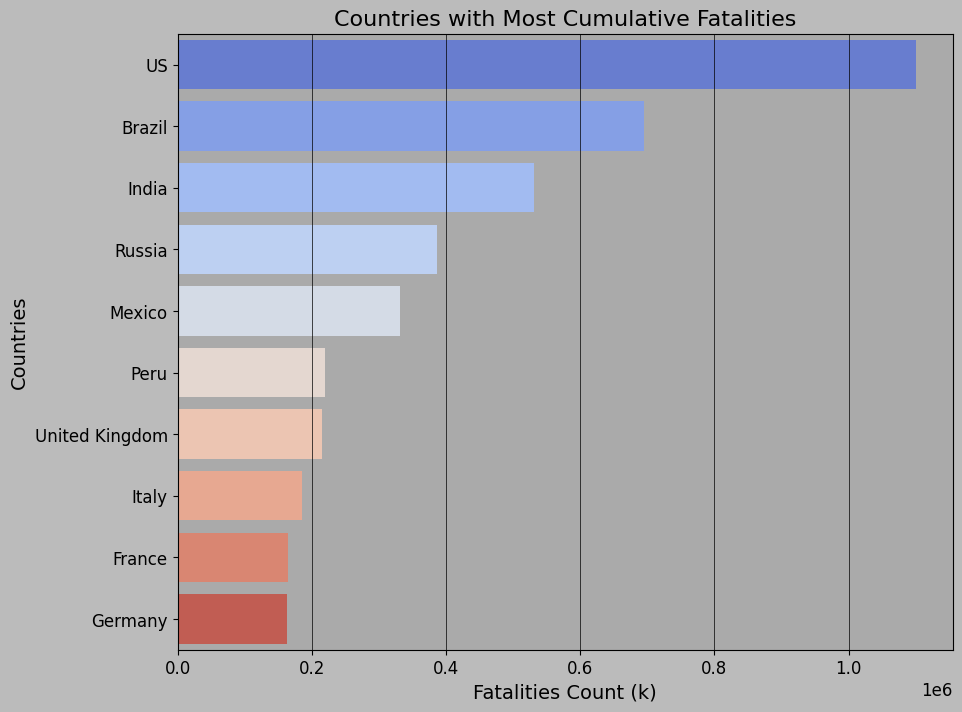

In [15]:
# Cumulative Fatalities Count by Country

sns.barplot(df.groupby('country')['daily_deaths'].sum().sort_values(ascending=False)[:10],
            palette='coolwarm', orient='h')
plt.title('Countries with Most Cumulative Fatalities')
plt.xlabel('Fatalities Count (k)')
plt.ylabel('Countries')
plt.grid(axis='x')
plt.show()

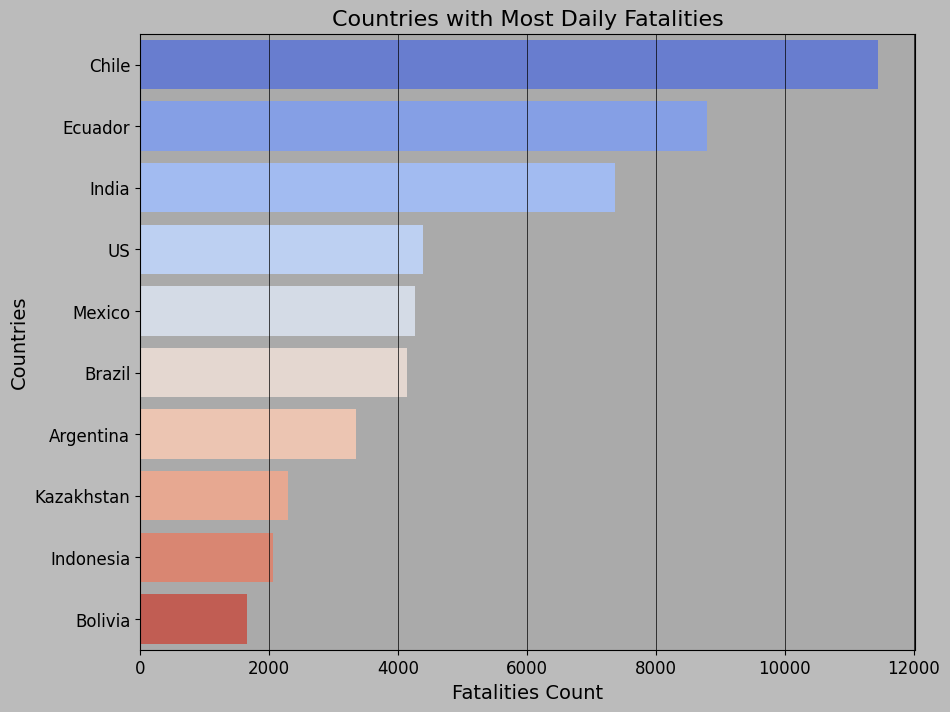

In [240]:
# Fatalities Count by Country

sns.barplot(df.groupby('country')['daily_deaths'].max().sort_values(ascending=False)[:10]
            ,palette='coolwarm', orient='h')
plt.title('Countries with Most Daily Fatalities')
plt.xlabel('Fatalities Count')
plt.ylabel('Countries')
plt.grid(axis='x')
plt.show()

##### Advanced Analysis

In [247]:
# Import necessary library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA

Predictive Modelling : \
Random Forest Regressor

In [248]:
# Prepare data
rfr_indexdate = df.set_index('date')['daily_deaths'].resample('D').sum().fillna(0).reset_index()

# Define features and target
X = rfr_indexdate[['date']]
y = rfr_indexdate['daily_deaths']

# Split to train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)

# Model Frediction and Evaluation
predict = rfr_model.predict(X_test)

mae = mean_absolute_error(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)

print(f'MAE: {mae} \nRMSE: {rmse} \nR2: {r2}')

MAE: 903.716880733945 
RMSE: 1240.555087903369 
R2: 0.9104427515019815


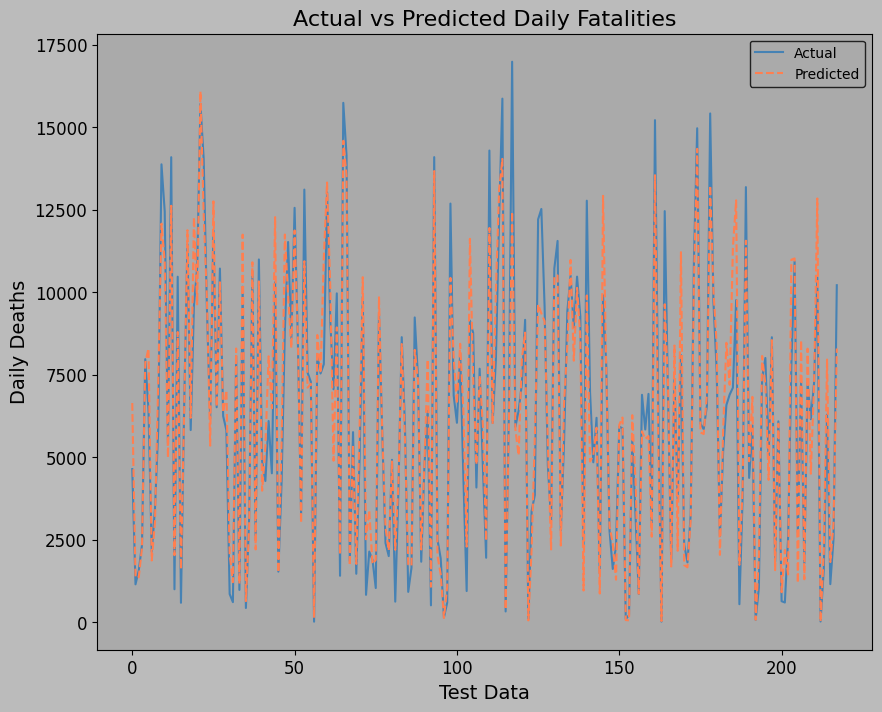

In [249]:
plt.plot(y_test.values, label='Actual', color='steelblue')
plt.plot(predict, label='Predicted', color='coral', linestyle='--')
plt.title('Actual vs Predicted Daily Fatalities')
plt.xlabel('Test Data')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()

Forecasting Modelling : \
ARIMA

In [250]:
# Prepare data
arima_indexdate = df.set_index('date')
arima_indexdate = arima_indexdate['daily_deaths'].resample('D').sum()

# Define features and target
train_size = int(len(arima_indexdate) * 0.8)

# Split to train-test
train, test = arima_indexdate[:train_size], arima_indexdate[train_size:]
arima_model = ARIMA(train, order=(5,1,2))
arima_model_fit = arima_model.fit()

# Model Forecast adn Evaluation
forecast = arima_model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
r2 = r2_score(test, forecast)
print(f'MAE: {mae} \nRMSE: {rmse} \nR2: {r2}')

MAE: 497.4309546056128 
RMSE: 633.8049660308346 
R2: 0.3953395626626305


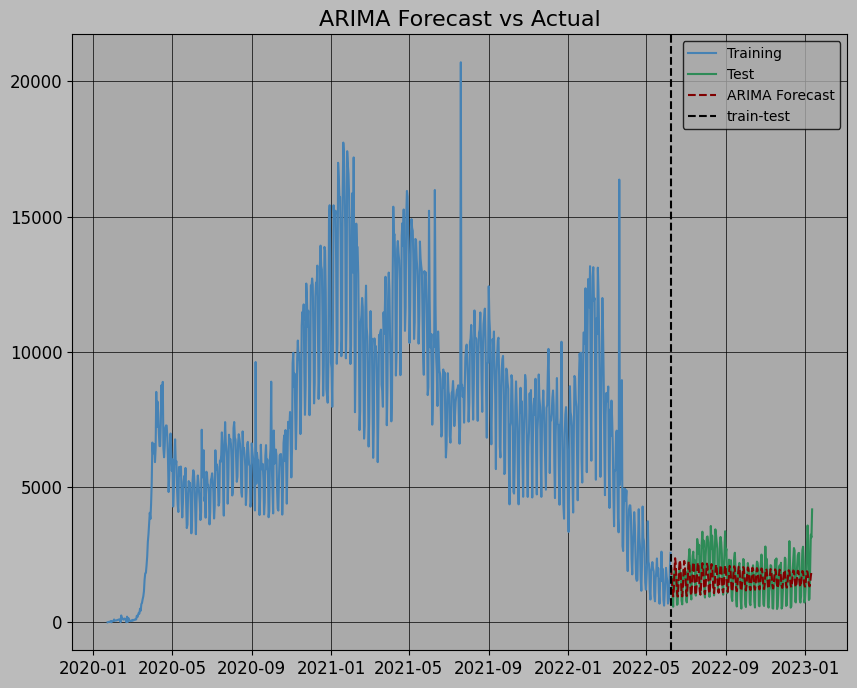

In [251]:
# Plot results

plt.plot(train, label='Training', color='steelblue')
plt.plot(test, label='Test', color='seagreen')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='maroon', linestyle='--')
plt.title(f'ARIMA Forecast vs Actual')
plt.axvline(test.index[0], color='black', linestyle='--', label='train-test')
plt.legend()
plt.grid()
plt.show()

##### Summary/Conclusion

- Significant peak fatalities count on *2021* with total of 3568852 fatalities
- Highest fatalities count on *January 2021* with total of 421677 fatalities
- Countries with highest cumulative fatalities count : 
  - *USA* with 1099996 fatality
  - *Brazil* with 695319 fatality
  - *India* with 530726 fatality
  - *Russia* with 386329 fatality
  - *Mexico* with 331448 fatality

- Countries with highest daily fatalities count : 
  - *Chile* with 11447 fatality
  - *Ecuador* with 8786 fatality
  - *India* with 7374 fatality